In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
dataset = pd.read_csv("covid_data.csv", parse_dates = ["Date"])

dataset.sample(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
7669,10770,NaN,Djibouti,2020-03-31,30.0,0.0
9937,13968,NaN,Guatemala,2020-03-19,9.0,1.0
94,126,NaN,Albania,2020-02-09,0.0,0.0
2614,3669,NaN,Burma,2020-02-21,0.0,0.0
7264,10210,NaN,Czechia,2020-03-06,18.0,0.0


In [199]:
dataset.rename(columns = {'ConfirmedCases' :'Confirmed','Country_Region' : 'Country','Fatalities' : 'Deaths'}, inplace = True)
print(dataset.columns)

Index(['Id', 'Province_State', 'Country', 'Date', 'Confirmed', 'Deaths'], dtype='object')


In [200]:
dataset.tail()

,Id,Province_State,Country,Date,Confirmed,Deaths
23251,32707,NaN,Zimbabwe,2020-04-02,9.0,1.0
23252,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23253,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23254,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23255,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0


In [201]:
dataset.dtypes

Id                         int64
Province_State            object
Country                   object
Date              datetime64[ns]
Confirmed                float64
Deaths                   float64
dtype: object

In [202]:
dataset.head()

,Id,Province_State,Country,Date,Confirmed,Deaths
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [203]:
dataset.isnull().sum().to_frame('nulls')
df = dataset.groupby(["Date","Country"])[['Date','Country','Confirmed','Deaths']].sum().reset_index()
df.head()

,Date,Country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0.0,0.0
1,2020-01-22,Albania,0.0,0.0
2,2020-01-22,Algeria,0.0,0.0
3,2020-01-22,Andorra,0.0,0.0
4,2020-01-22,Angola,0.0,0.0


In [204]:
# grouping and Rating Confirmed,Death, recovered
Confirmed_Sorted = df.sort_values('Confirmed',ascending = False)
Confirmed_Sorted = Confirmed_Sorted.drop_duplicates('Country')

Confirmed_cases = (Confirmed_Sorted["Confirmed"].sum())/1000

Death_cases = (Confirmed_Sorted["Deaths"].sum())/1000


World_Death_rate = ((Death_cases * 100 )/ Confirmed_cases)


Active = Confirmed_cases - Death_cases

China = Confirmed_Sorted[Confirmed_Sorted["Country"] == "China"]


In [205]:
Detail = {"Total Confirmed cases in the World (In Thousand)" : Confirmed_cases,
          "Total Death Cases in the world (In Thousand)" : Death_cases,
          "Active (In Thousand)" : Active,
          "Rate of Death cases %" : World_Death_rate,
         }
op = pd.DataFrame.from_dict(Detail,orient = 'index',columns = ["Total in Thousand"])
op.style.background_gradient(cmap = "RED")
print(op)

                                                  Total in Thousand
Total Confirmed cases in the World (In Thousand)        1344.856000
Total Death Cases in the world (In Thousand)              74.559000
Active (In Thousand)                                    1270.297000
Rate of Death cases %                                      5.544014


In [206]:
case_per_day = df.groupby(["Date"])[["Confirmed","Deaths"]].sum().reset_index()
Confirmed_cases_1 = case_per_day.sort_values("Date",ascending =False)

x = case_per_day.index

y1 = case_per_day.Confirmed
y2 = case_per_day.Deaths

print(case_per_day)

         Date  Confirmed   Deaths
0  2020-01-22      554.0     17.0
1  2020-01-23      653.0     18.0
2  2020-01-24      939.0     26.0
3  2020-01-25     1432.0     42.0
4  2020-01-26     2113.0     56.0
..        ...        ...      ...
71 2020-04-02  1012981.0  52978.0
72 2020-04-03  1095739.0  58782.0
73 2020-04-04  1197225.0  64601.0
74 2020-04-05  1271928.0  69369.0
75 2020-04-06  1344856.0  74560.0

[76 rows x 3 columns]


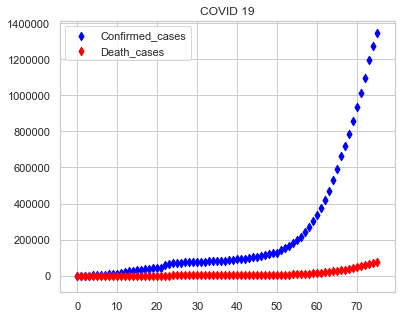

In [207]:
# visualizing death,recoveryy, confrimed case
sns.set(style = "whitegrid")
f,ax = plt.subplots(figsize =(6,5))

plt.scatter(x,y1,color = "Blue",label = "Confirmed_cases", marker = "d")
plt.scatter(x,y2,color = "red", label = "Death_cases",marker = "d")
plt.title("COVID 19")
plt.legend(loc = "upper left", frameon = True)
plt.show()

## COVID-19 global tendency excluding China

Text(0.5, 0, 'Date')

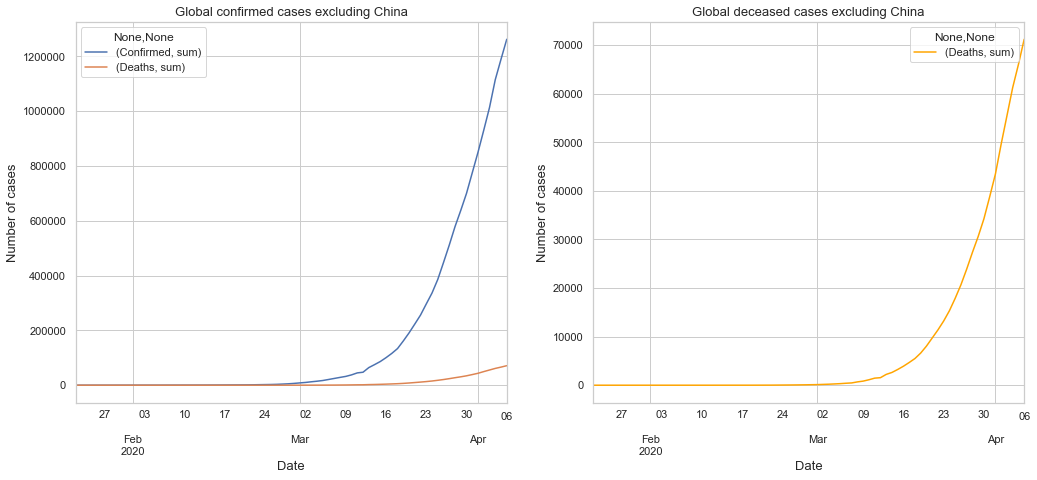

In [208]:
confirmed_total_date_noChina = df[df['Country']!='China'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_noChina = df[df['Country']!='China'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## COVID-19 trend in China
Since China was the initial infected country, the COVID-19 behavior is different from the rest of the world. The medical system was not prepared for the pandemic, in fact no one was aware of the virus until several cases were reported. Moreover, China government took strong contention measures in a considerable short period of time and, while the virus is widely spread, they have been able to control the increasing of the infections.

Text(0.5, 0, 'Date')

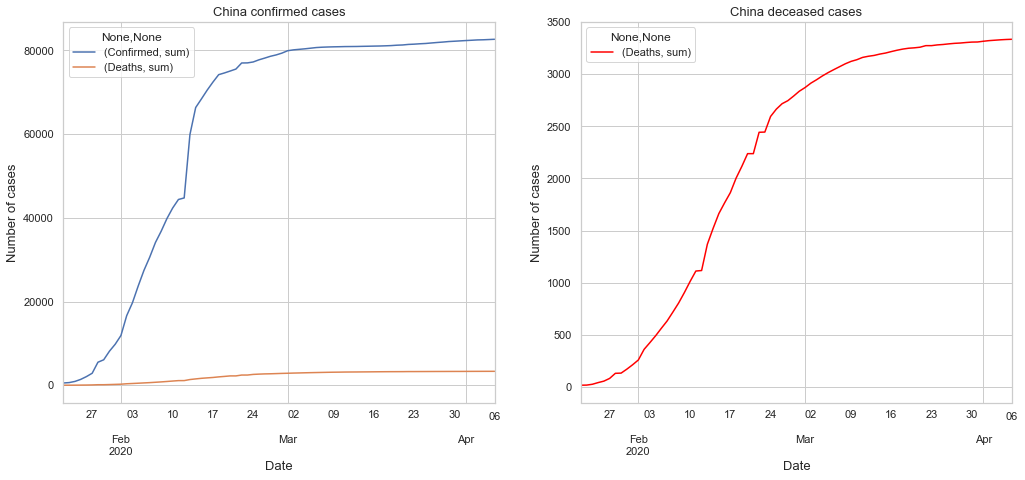

In [209]:
confirmed_total_date_China = df[df['Country']=='China'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_China = df[df['Country']=='China'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_China.plot(ax=ax2, color='Red')
ax2.set_title("China deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## COVID-19 trend in INDIA

Text(0.5, 0, 'Date')

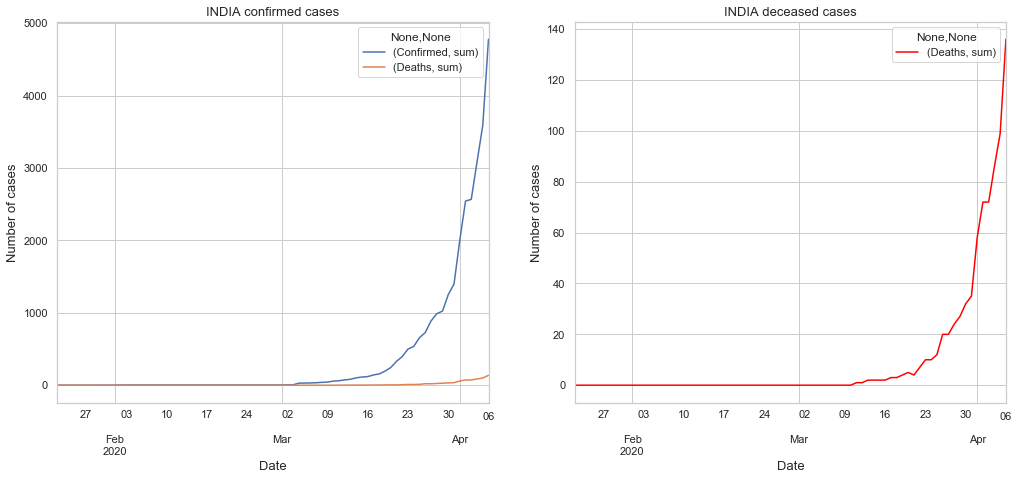

In [210]:
confirmed_total_date_India = df[df['Country']=='India'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_India = df[df['Country']=='India'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_India = confirmed_total_date_India.join(fatalities_total_date_India)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_India.plot(ax=ax1)
ax1.set_title("INDIA confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_India.plot(ax=ax2, color='Red')
ax2.set_title("INDIA deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## COVID-19 trend in US

Text(0.5, 0, 'Date')

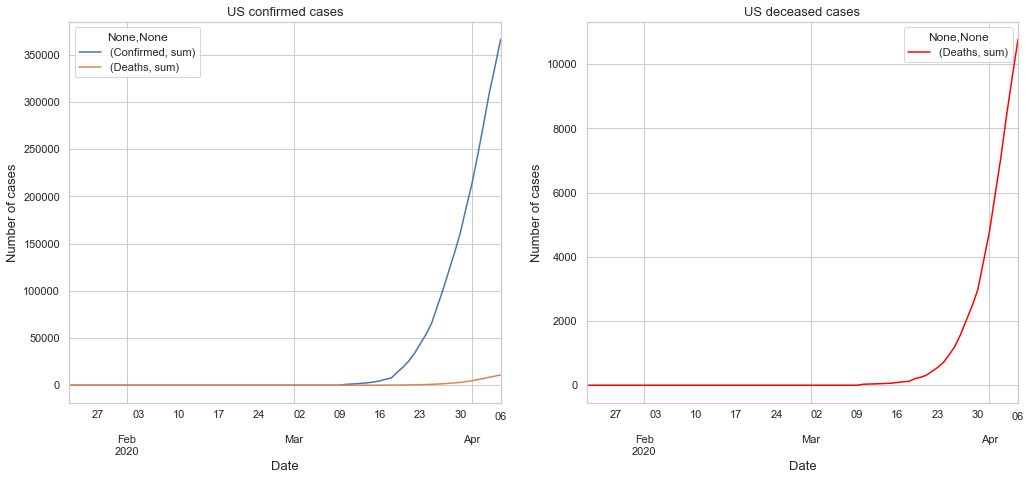

In [211]:
confirmed_total_date_US = df[df['Country']=='US'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_US = df[df['Country']=='US'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_US.plot(ax=ax1)
ax1.set_title("US confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_US.plot(ax=ax2, color='Red')
ax2.set_title("US deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## COVID-19 trends in Italy, Spain, UK,Malaysia, Australia and Singapore
Both Italy and Spain are experiencing the larger increase in COVID-19 positives in Europe. At the same time, UK is a unique case given that it's one of the most important countries in Europe but recently has left the European Union, which has create an effective barrier to human mobility from other countries. The fourth country we will study in this section is Singapore, since it's an asiatic island, is closer to China and its socio-economic conditions is different from the other three countries.

In [212]:
# confirmed cases in Italy
confirmed_total_date_Italy = df[df['Country']=='Italy'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Italy = df[df['Country']=='Italy'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#confirmed cases in Spain
confirmed_total_date_Spain = df[df['Country']=='Spain'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Spain = df[df['Country']=='Spain'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

#confirmed cases in UK
confirmed_total_date_UK = df[df['Country']=='United Kingdom'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_UK = df[df['Country']=='United Kingdom'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

#confirmed cases in Singapore
confirmed_total_date_Singapore = df[df['Country']=='Singapore'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Singapore = df[df['Country']=='Singapore'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

#confirmed cases in Malaysia
confirmed_total_date_Malaysia = df[df['Country']=='Malaysia'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Malaysia = df[df['Country']=='Malaysia'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Malaysia = confirmed_total_date_Malaysia.join(fatalities_total_date_Malaysia)

#confirmed cases in Australia
confirmed_total_date_Australia = df[df['Country']=='Australia'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Australia = df[df['Country']=='Australia'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)


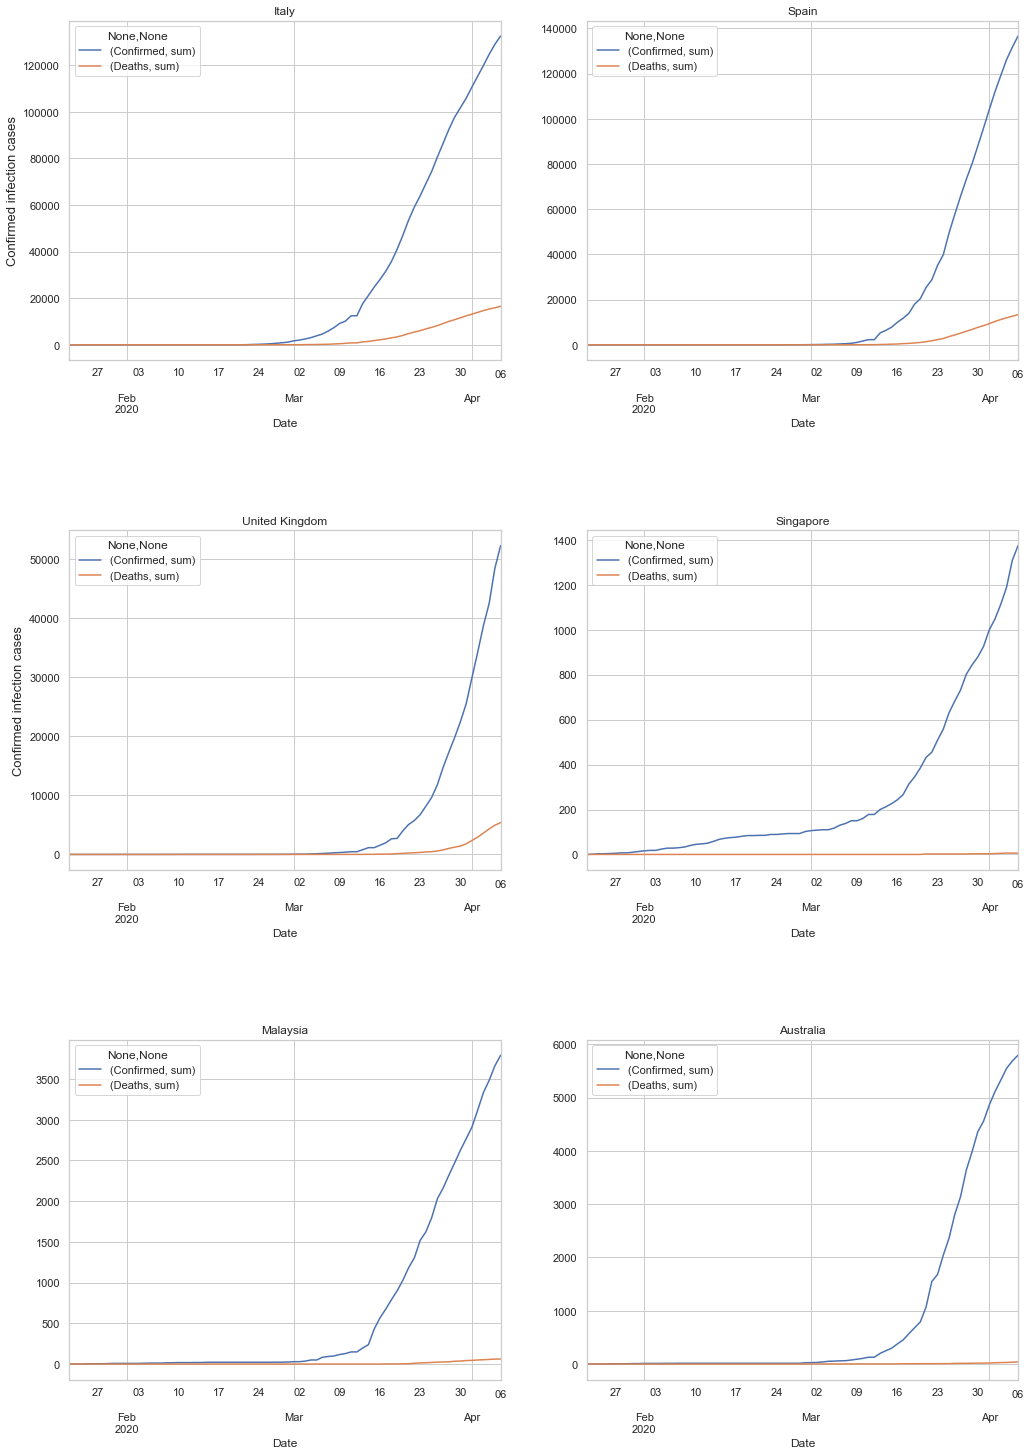

In [213]:
plt.figure(figsize=(17,25))
#plt.tight_layout(pad=3.0)
plt.subplot(3, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(3, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(3, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(3, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')

plt.subplot(3, 2, 5)
total_date_Malaysia.plot(ax=plt.gca(), title='Malaysia')

plt.subplot(3, 2, 6)
total_date_Australia.plot(ax=plt.gca(), title='Australia')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [214]:
# Evolution of the infections from the first confirmed case in ITALY
confirmed_total_date_Italy = df[(df['Country']=='Italy') & df['Confirmed']!=0].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Italy = df[(df['Country']=='Italy') & df['Confirmed']!=0].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

# Evolution of the infections from the first confirmed case in SPAIN
confirmed_total_date_Spain = df[(df['Country']=='Spain') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Spain = df[(df['Country']=='Spain') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
                                     
# Evolution of the infections from the first confirmed case in UK
confirmed_total_date_UK = df[(df['Country']=='United Kingdom') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_UK = df[(df['Country']=='United Kingdom') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

# Evolution of the infections from the first confirmed case in SINGAPORE
confirmed_total_date_Singapore = df[(df['Country']=='Singapore') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Singapore = df[(df['Country']=='Singapore') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

italy = [i for i in total_date_Italy.Confirmed['sum'].values]
italy_30 = italy[0:70] 
spain = [i for i in total_date_Spain.Confirmed['sum'].values]
spain_30 = spain[0:70] 
UK = [i for i in total_date_UK.Confirmed['sum'].values]
UK_30 = UK[0:70] 
singapore = [i for i in total_date_Singapore.Confirmed['sum'].values]
singapore_30 = singapore[0:70] 


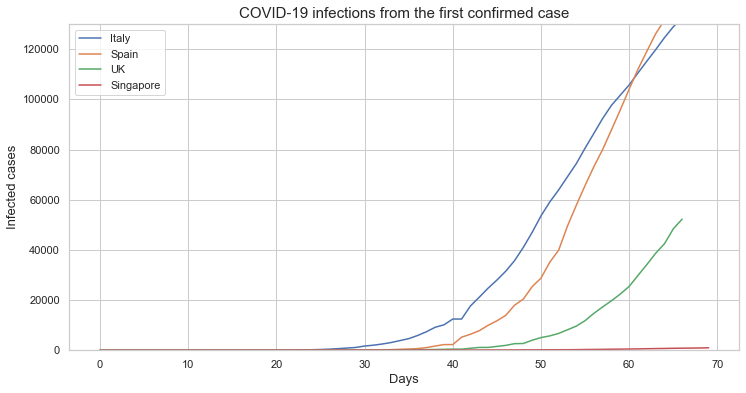

In [215]:
# Plots
plt.figure(figsize=(12,6))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.plot(singapore_30)
plt.legend(["Italy", "Spain", "UK", "Singapore"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 130000)
plt.show()

In [216]:
df_date = dataset.groupby(["Date","Country"])[["Date","Country","Confirmed","Deaths"]].sum().reset_index()
sort_diff_date = df_date.sort_values("Country",ascending = False)

x1 = sort_diff_date[sort_diff_date.Date == '2020-04-06'].reset_index().drop('index',axis = 1)
x2 = sort_diff_date[sort_diff_date.Date == '2020-04-05'].reset_index().drop('index',axis = 1)

h = pd.merge(x2, x1,on = "Country")

h["New Confirmed Cases"] = h["Confirmed_y"]-h["Confirmed_x"]
h["New Death cases"] = h["Deaths_y"]-h["Deaths_x"]

h1 = h.sort_values('New Confirmed Cases', ascending = False).head(50)
h1 = h1.drop(["Confirmed_y","Confirmed_x","Deaths_y","Deaths_x","Date_x"],axis = 1)

print("New confirmed cases in 06/04/2020")
print(h1)


New confirmed cases in 06/04/2020
                  Country     Date_y  New Confirmed Cases  New Death cases
11                     US 2020-04-06              29542.0           1164.0
118                France 2020-04-06               5190.0            833.0
26                  Spain 2020-04-06               5029.0            700.0
7          United Kingdom 2020-04-06               3843.0            442.0
95                  Italy 2020-04-06               3599.0            636.0
114               Germany 2020-04-06               3251.0            226.0
12                 Turkey 2020-04-06               3148.0             75.0
99                   Iran 2020-04-06               2274.0            136.0
101                 India 2020-04-06               1190.0             37.0
163               Belgium 2020-04-06               1123.0            185.0
156                Brazil 2020-04-06               1031.0             78.0
60            Netherlands 2020-04-06                973.0         

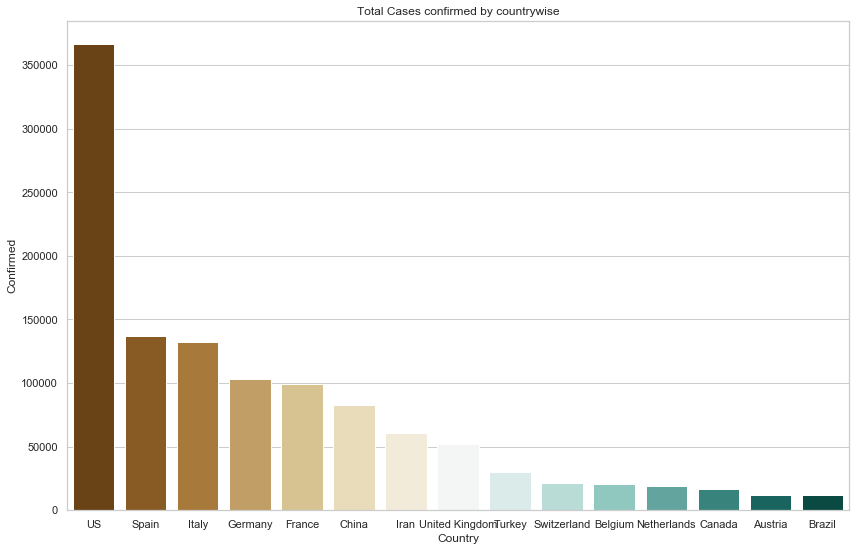

In [217]:
#plotting Total cases Confirmed Countrywise
sort_by_confirmed = Confirmed_Sorted.head(15)
x = sort_by_confirmed.Country
y = sort_by_confirmed.Confirmed
plt.figure(figsize = (14,9))
sns.barplot(x,y ,order =x, palette = "BrBG").set_title("Total Cases confirmed by countrywise")
plt.show()

In [218]:
x_data = pd.DataFrame(case_per_day.index)
y_data = pd.DataFrame(case_per_day.Confirmed)


In [219]:
#Splitting train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.1,random_state = 0)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [220]:
#Polynomial features
Poly_re = PolynomialFeatures(degree = 5)
x_poly = Poly_re.fit_transform(X_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

x3 = case_per_day.index
x4 = case_per_day.Confirmed

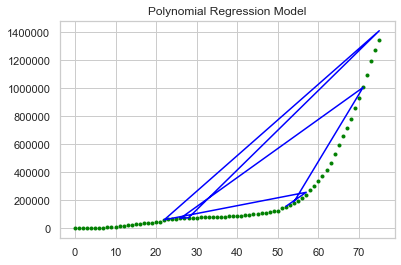

In [221]:
#Visualizing
plt.scatter(x3,x4, color = "Green",marker = ".")
plt.plot(X_test,lin_reg2.predict(Poly_re.fit_transform(X_test)),color = "blue")
plt.title("Polynomial Regression Model")
plt.show()

In [222]:
#Predicting
y_pred = lin_reg2.predict(Poly_re.fit_transform(X_test))

In [223]:
# R2 Score 
from sklearn.metrics import r2_score
print("Polynomial Regression ",r2_score(y_test,y_pred))

Polynomial Regression  0.9971494244906492


In [224]:
#Future Prediction
print("After {0} day will be {1} case in the world".format((77-len(case_per_day)),lin_reg2.predict(Poly_re.fit_transform([[77]]))))


After 1 day will be [[1657143.31171359]] case in the world
